In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder

In [91]:
import xgboost
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
import pickle

In [92]:
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.inspection import plot_partial_dependence
from sklearn.model_selection import train_test_split

In [93]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
df = pd.read_csv("train_HousePrices_v1.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


<AxesSubplot: >

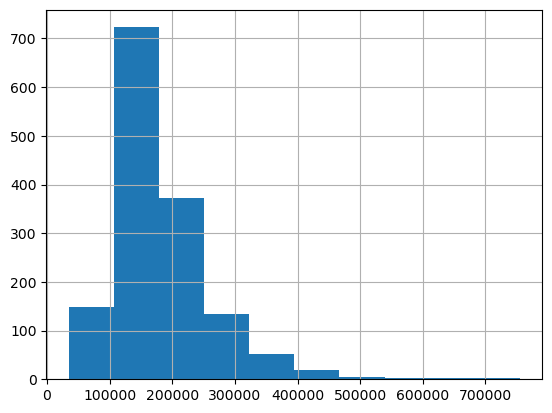

In [6]:
df["SalePrice"].hist()

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Three observations: 

#### 1) Entries marked as NA when in reality its simply that the house does not contain this feature versus missing data
Entries marked as NA such as Alley are not actual missing data, rather they are the absence of the item for example the alley.
I can change the NA in such cases to NONE, to have a label that is not interpreted as NA
These columns are:
-Alley (doesent have alley if NA)
-FireplaceQu (no fireplace)
-GarageType
-Garage Finish
-PoolQC
-Fence
-MiscFeature
-GarageQual
-GarageCond

#### 2) Handling missing values from dates for example garage year built 
GarageYrBlt, since its a date how to treat NA? Create new column that will group dates based on bins where 0 = No garage, 1 = 30+ years ago, 2= 25-29 yrs ago etc. Need to see spread of dates


Similar handling for GarageCars and GarageArea as GarageYrBlt
Need to check LotFrontage to see missing area

#### 3) Handling few missing entries
 Electrical
 MasVnrType
 MasVnrArea
 BsmtQual
 BsmtCond
 BsmtExposure
 BsmtFinType1 
 
 Using KNN imputer to impute the missing values?
 Or checking other basement values that are full to regain the missing values using knn
 BsmtFinSF2 = Type 2 finished square feet
 BsmtUnfSF = Unfinished square feet of basement area
 TotalBsmtSF: Total square feet of basement area
 
 Maybe can slice just the bsmt information and use knn imputer in just these values

### Observation one, converting NA from specific columns to value == None

In [8]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [9]:
df["Alley"].head(10)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: Alley, dtype: object

In [10]:
#make a copy of the original dataframe
df_copy_1 = df.copy()

In [11]:
df_obj_1 = df_copy_1[["Alley","FireplaceQu","GarageType","GarageFinish","PoolQC","Fence","MiscFeature","GarageQual","GarageCond"]].fillna("None")
#filter out the desired columns and fill na. Then save into a dataframe by itself
# -GarageQual
# -GarageCond

In [12]:
df_obj_1

,Alley,FireplaceQu,GarageType,GarageFinish,PoolQC,Fence,MiscFeature,GarageQual,GarageCond
0,None,None,Attchd,RFn,None,None,None,TA,TA
1,None,TA,Attchd,RFn,None,None,None,TA,TA
2,None,TA,Attchd,RFn,None,None,None,TA,TA
3,None,Gd,Detchd,Unf,None,None,None,TA,TA
4,None,TA,Attchd,RFn,None,None,None,TA,TA
...,...,...,...,...,...,...,...,...,...
1455,None,TA,Attchd,RFn,None,None,None,TA,TA
1456,None,TA,Attchd,Unf,None,MnPrv,None,TA,TA
1457,None,Gd,Attchd,RFn,None,GdPrv,Shed,TA,TA
1458,None,None,Attchd,Unf,None,None,None,TA,TA


In [13]:
#drop the columns we filtered out from the copy of the original dataframe
df_copy_1.drop(["Alley","FireplaceQu","GarageType","GarageFinish","PoolQC","Fence","MiscFeature","GarageQual","GarageCond"],axis=1,inplace=True)


In [14]:
df_copy_1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [15]:
#re-add the columns to the copy of the original dataframe. The columns now have the value None versus NA. Save the result to df_obj_1_done
result = [df_obj_1,df_copy_1]
df_obj_1_done =pd.concat(result,axis=1)

In [16]:
df_obj_1_done

,Alley,FireplaceQu,GarageType,GarageFinish,PoolQC,Fence,MiscFeature,GarageQual,GarageCond,Id,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,None,None,Attchd,RFn,None,None,None,TA,TA,1,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,None,TA,Attchd,RFn,None,None,None,TA,TA,2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,None,TA,Attchd,RFn,None,None,None,TA,TA,3,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,None,Gd,Detchd,Unf,None,None,None,TA,TA,4,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,None,TA,Attchd,RFn,None,None,None,TA,TA,5,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,None,TA,Attchd,RFn,None,None,None,TA,TA,1456,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,None,TA,Attchd,Unf,None,MnPrv,None,TA,TA,1457,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,None,Gd,Attchd,RFn,None,GdPrv,Shed,TA,TA,1458,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,None,None,Attchd,Unf,None,None,None,TA,TA,1459,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [17]:
df_obj_1_done.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Alley          1460 non-null   object 
 1   FireplaceQu    1460 non-null   object 
 2   GarageType     1460 non-null   object 
 3   GarageFinish   1460 non-null   object 
 4   PoolQC         1460 non-null   object 
 5   Fence          1460 non-null   object 
 6   MiscFeature    1460 non-null   object 
 7   GarageQual     1460 non-null   object 
 8   GarageCond     1460 non-null   object 
 9   Id             1460 non-null   int64  
 10  MSSubClass     1460 non-null   int64  
 11  MSZoning       1460 non-null   object 
 12  LotFrontage    1201 non-null   float64
 13  LotArea        1460 non-null   int64  
 14  Street         1460 non-null   object 
 15  LotShape       1460 non-null   object 
 16  LandContour    1460 non-null   object 
 17  Utilities      1460 non-null   object 
 18  LotConfi

----

### Objective 2, filling missing year values

##### Starting with column GarageYrBlt

<AxesSubplot: >

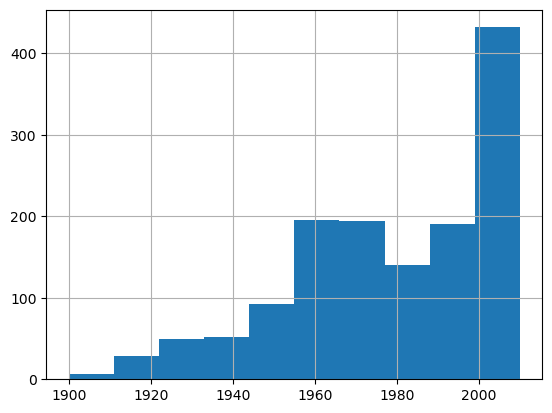

In [18]:
#Check the distribution of the column to identfy bins in order to split the data into a new column of clusters
# each cluster will contain~20 yrs
df_obj_1_done["GarageYrBlt"].hist()

In [19]:
df_obj_1_done["GarageYrBlt"].describe()
#check the spread of data and std

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [20]:
max_garage_yr = df_obj_1_done["GarageYrBlt"].max()
# obtain the max year of garageyrblt and save it to a variable to use it in our function below

2) Handling missing values from dates for example garage year built
GarageYrBlt, since its a date how to treat NA? Create new column that will group dates based on bins where 0 = No garage, 1 = 30+ years ago, 2= 25-29 yrs ago etc. Need to see spread of dates -GarageQual -GarageCond

Similar handling for GarageCars and GarageArea as GarageYrBlt Need to check LotFrontage to see missing area

In [21]:
# our function will assign a cluster to each house based on the difference of the max yr in the column minus the house year
# if we have a missing value meaning no garage the label of 0 will be assigned
def garage_date(x):
    if pd.isnull(x):
        return 0
    elif max_garage_yr - x >= 100:
        return 1
    elif max_garage_yr - x >= 80 and max_garage_yr - x < 100:
        return 2
    elif max_garage_yr - x >= 60 and max_garage_yr - x <80:
        return 3
    elif max_garage_yr - x >= 40 and max_garage_yr - x <60:
        return 4
    elif max_garage_yr - x >= 20 and max_garage_yr - x <40:
        return 5
    elif max_garage_yr - x >= 0 and max_garage_yr - x <20:
        return 6

In [22]:
#we test the function to validate it is working
df_obj_1_done["GarageYrBlt"].apply(garage_date)

0       6
1       5
2       6
3       6
4       6
       ..
1455    6
1456    5
1457    3
1458    3
1459    4
Name: GarageYrBlt, Length: 1460, dtype: int64

In [23]:
# create a copy of the dataframe
df_obj_2_done =df_obj_1_done.copy()

In [24]:
df_obj_2_done

,Alley,FireplaceQu,GarageType,GarageFinish,PoolQC,Fence,MiscFeature,GarageQual,GarageCond,Id,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,None,None,Attchd,RFn,None,None,None,TA,TA,1,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,None,TA,Attchd,RFn,None,None,None,TA,TA,2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,None,TA,Attchd,RFn,None,None,None,TA,TA,3,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,None,Gd,Detchd,Unf,None,None,None,TA,TA,4,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,None,TA,Attchd,RFn,None,None,None,TA,TA,5,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,None,TA,Attchd,RFn,None,None,None,TA,TA,1456,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,None,TA,Attchd,Unf,None,MnPrv,None,TA,TA,1457,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,None,Gd,Attchd,RFn,None,GdPrv,Shed,TA,TA,1458,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,None,None,Attchd,Unf,None,None,None,TA,TA,1459,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [25]:
#save it in a new column
df_obj_2_done["GarageYrBltCluster"]=df_obj_2_done["GarageYrBlt"].apply(garage_date)

In [26]:
df_obj_2_done

,Alley,FireplaceQu,GarageType,GarageFinish,PoolQC,Fence,MiscFeature,GarageQual,GarageCond,Id,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltCluster
0,None,None,Attchd,RFn,None,None,None,TA,TA,1,...,0,0,0,0,2,2008,WD,Normal,208500,6
1,None,TA,Attchd,RFn,None,None,None,TA,TA,2,...,0,0,0,0,5,2007,WD,Normal,181500,5
2,None,TA,Attchd,RFn,None,None,None,TA,TA,3,...,0,0,0,0,9,2008,WD,Normal,223500,6
3,None,Gd,Detchd,Unf,None,None,None,TA,TA,4,...,0,0,0,0,2,2006,WD,Abnorml,140000,6
4,None,TA,Attchd,RFn,None,None,None,TA,TA,5,...,0,0,0,0,12,2008,WD,Normal,250000,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,None,TA,Attchd,RFn,None,None,None,TA,TA,1456,...,0,0,0,0,8,2007,WD,Normal,175000,6
1456,None,TA,Attchd,Unf,None,MnPrv,None,TA,TA,1457,...,0,0,0,0,2,2010,WD,Normal,210000,5
1457,None,Gd,Attchd,RFn,None,GdPrv,Shed,TA,TA,1458,...,0,0,0,2500,5,2010,WD,Normal,266500,3
1458,None,None,Attchd,Unf,None,None,None,TA,TA,1459,...,0,0,0,0,4,2010,WD,Normal,142125,3


In [27]:
# remove the GarageYrBlt column
df_obj_2_done.drop("GarageYrBlt",axis=1,inplace=True)

##### Explore GarageCars GarageArea

In [28]:
#GarageCars and GarageArea appear to be the same
#Garage Cars measures the capacity in terms of cars that can fit, while GarageArea based on square feet
# We will check the spread of both to see which one we will keep

<AxesSubplot: >

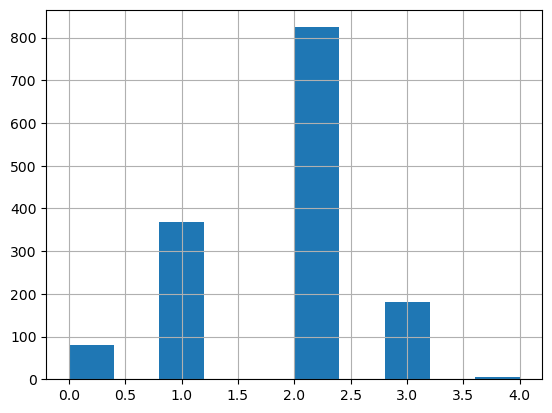

In [29]:
df_obj_2_done["GarageCars"].hist()

In [30]:
df_obj_2_done["GarageCars"].describe()

count    1460.000000
mean        1.767123
std         0.747315
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         4.000000
Name: GarageCars, dtype: float64

<AxesSubplot: >

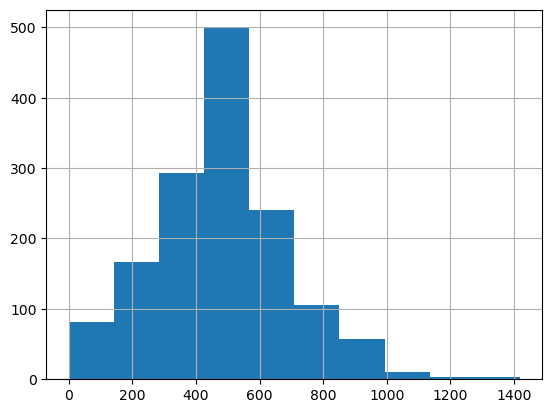

In [31]:
df_obj_2_done["GarageArea"].hist()

In [32]:
df_obj_2_done["GarageArea"].describe()

count    1460.000000
mean      472.980137
std       213.804841
min         0.000000
25%       334.500000
50%       480.000000
75%       576.000000
max      1418.000000
Name: GarageArea, dtype: float64

In [33]:
# we will keep only GarageCars since we will have less number of categories for the new column (can split in less bins)
df_obj_2_done.drop("GarageArea",axis=1,inplace = True)

##### GarageCars bins

In [34]:
# save the max number of car capacity to a variable
#garage_cars_max = df_obj_2_done["GarageCars"].max()

In [35]:
#if null assign to category 0, meaning does not exist. To not overlap with values that are actually 0
# else assign +1 to the value. So for a car capacity of 4 would become 5
def garage_cars(x):
    if pd.isnull(x):
        return 0
    else:
        return x + 1

In [36]:
df_obj_2_done["GarageCars"].apply(garage_cars)

0       3
1       3
2       3
3       4
4       4
       ..
1455    3
1456    3
1457    2
1458    2
1459    2
Name: GarageCars, Length: 1460, dtype: int64

In [37]:
df_obj_2_done["GarageCarsClusters"]=df_obj_2_done["GarageCars"].apply(garage_cars)

In [38]:
df_obj_2_done

,Alley,FireplaceQu,GarageType,GarageFinish,PoolQC,Fence,MiscFeature,GarageQual,GarageCond,Id,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltCluster,GarageCarsClusters
0,None,None,Attchd,RFn,None,None,None,TA,TA,1,...,0,0,0,2,2008,WD,Normal,208500,6,3
1,None,TA,Attchd,RFn,None,None,None,TA,TA,2,...,0,0,0,5,2007,WD,Normal,181500,5,3
2,None,TA,Attchd,RFn,None,None,None,TA,TA,3,...,0,0,0,9,2008,WD,Normal,223500,6,3
3,None,Gd,Detchd,Unf,None,None,None,TA,TA,4,...,0,0,0,2,2006,WD,Abnorml,140000,6,4
4,None,TA,Attchd,RFn,None,None,None,TA,TA,5,...,0,0,0,12,2008,WD,Normal,250000,6,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,None,TA,Attchd,RFn,None,None,None,TA,TA,1456,...,0,0,0,8,2007,WD,Normal,175000,6,3
1456,None,TA,Attchd,Unf,None,MnPrv,None,TA,TA,1457,...,0,0,0,2,2010,WD,Normal,210000,5,3
1457,None,Gd,Attchd,RFn,None,GdPrv,Shed,TA,TA,1458,...,0,0,2500,5,2010,WD,Normal,266500,3,2
1458,None,None,Attchd,Unf,None,None,None,TA,TA,1459,...,0,0,0,4,2010,WD,Normal,142125,3,2


In [39]:
#remove GarageCars
df_obj_2_done.drop("GarageCars",axis=1,inplace=True)

In [40]:
df_obj_2_done.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Alley               1460 non-null   object 
 1   FireplaceQu         1460 non-null   object 
 2   GarageType          1460 non-null   object 
 3   GarageFinish        1460 non-null   object 
 4   PoolQC              1460 non-null   object 
 5   Fence               1460 non-null   object 
 6   MiscFeature         1460 non-null   object 
 7   GarageQual          1460 non-null   object 
 8   GarageCond          1460 non-null   object 
 9   Id                  1460 non-null   int64  
 10  MSSubClass          1460 non-null   int64  
 11  MSZoning            1460 non-null   object 
 12  LotFrontage         1201 non-null   float64
 13  LotArea             1460 non-null   int64  
 14  Street              1460 non-null   object 
 15  LotShape            1460 non-null   object 
 16  LandCo

##### treating lot frontage 

<AxesSubplot: >

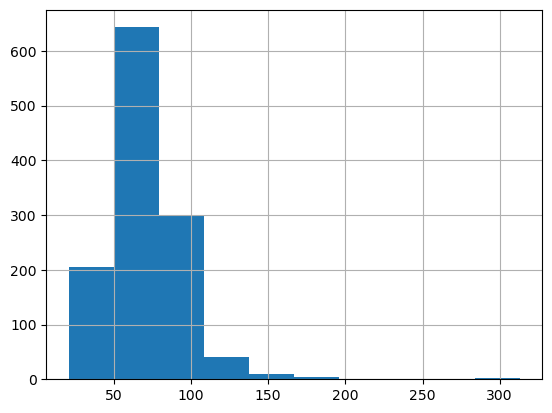

In [41]:
df_obj_2_done["LotFrontage"].hist()

In [42]:
df_obj_2_done["LotFrontage"].describe()
#we will create bins of 50

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [43]:
#lot_frontage_max = df_obj_2_done["LotFrontage"].max()

In [44]:
#function to create bins based on the lotfrontage column
def frontage_bins(x):
    if pd.isnull(x):
        return 0
    elif x >= 300:
        return 1
    elif x >= 250 and x < 300:
        return 2
    elif x >= 200 and x < 250:
        return 3
    elif x >= 150 and x < 200:
        return 4
    elif x >= 100 and x < 150:
        return 5
    elif x >= 50 and x < 100:
        return 6
    elif x >= 0 and x < 50:
        return 7

In [45]:
df_obj_2_done["LotFrontage"].apply(frontage_bins)
# test the function

0       6
1       6
2       6
3       6
4       6
       ..
1455    6
1456    6
1457    6
1458    6
1459    6
Name: LotFrontage, Length: 1460, dtype: int64

In [46]:
df_obj_2_done["LotFrontage"].apply(frontage_bins).describe() #validate the application

count    1460.000000
mean        4.957534
std         2.350006
min         0.000000
25%         6.000000
50%         6.000000
75%         6.000000
max         7.000000
Name: LotFrontage, dtype: float64

In [47]:
#save to new cluster column
df_obj_2_done["LotFrontageCluster"]=df_obj_2_done["LotFrontage"].apply(frontage_bins)

In [48]:
#drop the original LotFrontage
df_obj_2_done.drop("LotFrontage",axis=1,inplace=True)

In [49]:
df_obj_2_done.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Alley               1460 non-null   object 
 1   FireplaceQu         1460 non-null   object 
 2   GarageType          1460 non-null   object 
 3   GarageFinish        1460 non-null   object 
 4   PoolQC              1460 non-null   object 
 5   Fence               1460 non-null   object 
 6   MiscFeature         1460 non-null   object 
 7   GarageQual          1460 non-null   object 
 8   GarageCond          1460 non-null   object 
 9   Id                  1460 non-null   int64  
 10  MSSubClass          1460 non-null   int64  
 11  MSZoning            1460 non-null   object 
 12  LotArea             1460 non-null   int64  
 13  Street              1460 non-null   object 
 14  LotShape            1460 non-null   object 
 15  LandContour         1460 non-null   object 
 16  Utilit

In [50]:
#drop the id column
df_obj_2_done.drop("Id",axis=1,inplace=True)

In [51]:
df_obj_2_done.columns

Index(['Alley', 'FireplaceQu', 'GarageType', 'GarageFinish', 'PoolQC', 'Fence',
       'MiscFeature', 'GarageQual', 'GarageCond', 'MSSubClass', 'MSZoning',
       'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF'

In [52]:
### Objective 3

In [53]:
df_obj_2_done["MasVnrType"].value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64

In [54]:
# drop na since we cant inpute a value MasVnrType MasVnrArea

df_obj_2_done.dropna(subset=["MasVnrType","MasVnrArea"],inplace=True)

In [55]:
df_obj_2_done.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1452 entries, 0 to 1459
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Alley               1452 non-null   object 
 1   FireplaceQu         1452 non-null   object 
 2   GarageType          1452 non-null   object 
 3   GarageFinish        1452 non-null   object 
 4   PoolQC              1452 non-null   object 
 5   Fence               1452 non-null   object 
 6   MiscFeature         1452 non-null   object 
 7   GarageQual          1452 non-null   object 
 8   GarageCond          1452 non-null   object 
 9   MSSubClass          1452 non-null   int64  
 10  MSZoning            1452 non-null   object 
 11  LotArea             1452 non-null   int64  
 12  Street              1452 non-null   object 
 13  LotShape            1452 non-null   object 
 14  LandContour         1452 non-null   object 
 15  Utilities           1452 non-null   object 
 16  LotCon

In [56]:
df_obj_2_done.columns

Index(['Alley', 'FireplaceQu', 'GarageType', 'GarageFinish', 'PoolQC', 'Fence',
       'MiscFeature', 'GarageQual', 'GarageCond', 'MSSubClass', 'MSZoning',
       'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF'

In [57]:
df_obj_2_done_copy =df_obj_2_done.copy()
#df_obj_2_done['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1','BsmtFinType2', 'BsmtFinSF2']

In [58]:
df_obj2_bsmt = df_obj_2_done_copy[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1','BsmtFinType2', 'BsmtFinSF2']]

In [59]:
df_obj2_bsmt

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2
0,Gd,TA,No,GLQ,706,Unf,0
1,Gd,TA,Gd,ALQ,978,Unf,0
2,Gd,TA,Mn,GLQ,486,Unf,0
3,TA,Gd,No,ALQ,216,Unf,0
4,Gd,TA,Av,GLQ,655,Unf,0
...,...,...,...,...,...,...,...
1455,Gd,TA,No,Unf,0,Unf,0
1456,Gd,TA,No,ALQ,790,Rec,163
1457,TA,Gd,No,GLQ,275,Unf,0
1458,TA,TA,Mn,GLQ,49,Rec,1029


In [60]:
bsmt_imputer = KNNImputer()

In [61]:
df_obj2_bsmt_encoded = df_obj2_bsmt.apply(lambda series: pd.Series(
    LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
))

In [62]:
df_obj2_bsmt_imputed = bsmt_imputer.fit_transform(df_obj2_bsmt_encoded)

In [63]:
df_obj2_bsmt_df = pd.DataFrame(df_obj2_bsmt_imputed,columns=df_obj2_bsmt.columns)

In [64]:
df_obj2_bsmt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BsmtQual      1452 non-null   float64
 1   BsmtCond      1452 non-null   float64
 2   BsmtExposure  1452 non-null   float64
 3   BsmtFinType1  1452 non-null   float64
 4   BsmtFinSF1    1452 non-null   float64
 5   BsmtFinType2  1452 non-null   float64
 6   BsmtFinSF2    1452 non-null   float64
dtypes: float64(7)
memory usage: 79.5 KB


In [65]:
df_obj2_bsmt_df.columns

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2'],
      dtype='object')

In [66]:
df_obj_2_done

,Alley,FireplaceQu,GarageType,GarageFinish,PoolQC,Fence,MiscFeature,GarageQual,GarageCond,MSSubClass,...,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,GarageYrBltCluster,GarageCarsClusters,LotFrontageCluster
0,None,None,Attchd,RFn,None,None,None,TA,TA,60,...,0,0,2,2008,WD,Normal,208500,6,3,6
1,None,TA,Attchd,RFn,None,None,None,TA,TA,20,...,0,0,5,2007,WD,Normal,181500,5,3,6
2,None,TA,Attchd,RFn,None,None,None,TA,TA,60,...,0,0,9,2008,WD,Normal,223500,6,3,6
3,None,Gd,Detchd,Unf,None,None,None,TA,TA,70,...,0,0,2,2006,WD,Abnorml,140000,6,4,6
4,None,TA,Attchd,RFn,None,None,None,TA,TA,60,...,0,0,12,2008,WD,Normal,250000,6,4,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,None,TA,Attchd,RFn,None,None,None,TA,TA,60,...,0,0,8,2007,WD,Normal,175000,6,3,6
1456,None,TA,Attchd,Unf,None,MnPrv,None,TA,TA,20,...,0,0,2,2010,WD,Normal,210000,5,3,6
1457,None,Gd,Attchd,RFn,None,GdPrv,Shed,TA,TA,70,...,0,2500,5,2010,WD,Normal,266500,3,2,6
1458,None,None,Attchd,Unf,None,None,None,TA,TA,20,...,0,0,4,2010,WD,Normal,142125,3,2,6


In [67]:
df_obj_2_done.drop(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2'],axis=1,inplace=True)

In [68]:
df_obj_2_done.reset_index(inplace=True,drop=True)

In [69]:
df_obj_2_done.columns

Index(['Alley', 'FireplaceQu', 'GarageType', 'GarageFinish', 'PoolQC', 'Fence',
       'MiscFeature', 'GarageQual', 'GarageCond', 'MSSubClass', 'MSZoning',
       'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType'

In [70]:
df_obj2_bsmt_df

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2
0,2.0,3.0,3.0,2.0,361.0,5.0,0.0
1,2.0,3.0,1.0,0.0,480.0,5.0,0.0
2,2.0,3.0,2.0,2.0,222.0,5.0,0.0
3,3.0,1.0,3.0,0.0,66.0,5.0,0.0
4,2.0,3.0,0.0,2.0,328.0,5.0,0.0
...,...,...,...,...,...,...,...
1447,2.0,3.0,3.0,5.0,0.0,5.0,0.0
1448,2.0,3.0,3.0,0.0,407.0,4.0,29.0
1449,3.0,1.0,3.0,2.0,95.0,5.0,0.0
1450,3.0,3.0,2.0,2.0,14.0,4.0,134.0


In [71]:
result2 = [df_obj_2_done,df_obj2_bsmt_df]
df_obj_3_done =pd.concat(result2,axis=1)

In [72]:
df_obj_3_done

,Alley,FireplaceQu,GarageType,GarageFinish,PoolQC,Fence,MiscFeature,GarageQual,GarageCond,MSSubClass,...,GarageYrBltCluster,GarageCarsClusters,LotFrontageCluster,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2
0,None,None,Attchd,RFn,None,None,None,TA,TA,60,...,6,3,6,2.0,3.0,3.0,2.0,361.0,5.0,0.0
1,None,TA,Attchd,RFn,None,None,None,TA,TA,20,...,5,3,6,2.0,3.0,1.0,0.0,480.0,5.0,0.0
2,None,TA,Attchd,RFn,None,None,None,TA,TA,60,...,6,3,6,2.0,3.0,2.0,2.0,222.0,5.0,0.0
3,None,Gd,Detchd,Unf,None,None,None,TA,TA,70,...,6,4,6,3.0,1.0,3.0,0.0,66.0,5.0,0.0
4,None,TA,Attchd,RFn,None,None,None,TA,TA,60,...,6,4,6,2.0,3.0,0.0,2.0,328.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,None,TA,Attchd,RFn,None,None,None,TA,TA,60,...,6,3,6,2.0,3.0,3.0,5.0,0.0,5.0,0.0
1448,None,TA,Attchd,Unf,None,MnPrv,None,TA,TA,20,...,5,3,6,2.0,3.0,3.0,0.0,407.0,4.0,29.0
1449,None,Gd,Attchd,RFn,None,GdPrv,Shed,TA,TA,70,...,3,2,6,3.0,1.0,3.0,2.0,95.0,5.0,0.0
1450,None,None,Attchd,Unf,None,None,None,TA,TA,20,...,3,2,6,3.0,3.0,2.0,2.0,14.0,4.0,134.0


In [73]:
df_obj_3_done.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1452 entries, 0 to 1451
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Alley               1452 non-null   object 
 1   FireplaceQu         1452 non-null   object 
 2   GarageType          1452 non-null   object 
 3   GarageFinish        1452 non-null   object 
 4   PoolQC              1452 non-null   object 
 5   Fence               1452 non-null   object 
 6   MiscFeature         1452 non-null   object 
 7   GarageQual          1452 non-null   object 
 8   GarageCond          1452 non-null   object 
 9   MSSubClass          1452 non-null   int64  
 10  MSZoning            1452 non-null   object 
 11  LotArea             1452 non-null   int64  
 12  Street              1452 non-null   object 
 13  LotShape            1452 non-null   object 
 14  LandContour         1452 non-null   object 
 15  Utilities           1452 non-null   object 
 16  LotCon

----

In [506]:
# put the pd get dummies after dropping the sales price
# df_encoded = pd.get_dummies(df_obj_3_done,drop_first=True)

In [75]:
df_encoded = df_obj_3_done.copy()

In [345]:
X = df_encoded.drop("SalePrice",axis=1)

y = df_encoded["SalePrice"]

In [87]:
model = xgboost.XGBRegressor()

In [89]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [90]:
scores = cross_val_score(model, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [92]:
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 17381.427 (2444.351)


`----

In [97]:
space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

In [115]:


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0,shuffle=True)

In [103]:
def objective(space):
    clf=xgboost.XGBRegressor(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [104]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



SCORE:                                                                                                                 
0.0                                                                                                                    
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgb

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:02] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



SCORE:                                                                                                                 
0.0                                                                                                                    
[21:51:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgb

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



SCORE:
0.0                                                                                                                    
[21:51:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:0

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



SCORE:                                                                                                                 
0.0                                                                                                                    
[21:51:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:03] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgb

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:04] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:05] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:06] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:07] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:08] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:09] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:10] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



0.0                                                                                                                    
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARN

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:11] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:12] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:13] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:14] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:15] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



SCORE:
0.0                                                                                                                    
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:1

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:16] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



SCORE:                                                                                                                 
0.0                                                                                                                    
[21:51:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgb

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



0.0
[21:51:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset co

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



0.0
[21:51:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset co

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



[21:51:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[21:51:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):



In [105]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.8974630027320902, 'gamma': 3.186424642173762, 'max_depth': 8.0, 'min_child_weight': 4.0, 'reg_alpha': 74.0, 'reg_lambda': 0.26806108073224166}


In [112]:
model = xgboost.XGBRegressor(colsample_bytree= 0.8974630027320902, gamma= 3.186424642173762, max_depth= 8, min_child_weight= 4, reg_alpha= 74, reg_lambda= 0.26806108073224166)

In [113]:
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [114]:
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 19297.461 (2668.257)


----

In [116]:
model.fit(X_train,y_train)

C:\Users\nicolas.margos\Anaconda3\envs\NewEnv2\lib\site-packages\xgboost\data.py:250: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8974630027320902,
             enable_categorical=False, gamma=3.186424642173762, gpu_id=-1,
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=8,
             min_child_weight=4, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, predictor='auto',
             random_state=0, reg_alpha=74, reg_lambda=0.26806108073224166,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [118]:
shap_values = shap.TreeExplainer(model).shap_values(X_train, approximate=True)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
ntree_limit is deprecated, use `iteration_range` or model slicing instead.


In [125]:
shap_df = pd.DataFrame(shap_values)

In [126]:
shap_df

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
0,172.576355,-903.622070,-16271.734375,656.867188,-7479.388184,-2580.165771,-96.398354,-92.188400,-5614.341309,-1829.492065,...,0.0,0.0,-32.265007,0.0,7.776801,0.0,-4.783025,-5.366236,68.090385,0.0000
1,-1903.671875,1238.015137,-26527.099609,3507.150879,1774.996216,617.344421,-120.944817,8.821810,8652.004883,-5335.658691,...,0.0,0.0,0.000000,0.0,7.776801,0.0,-4.783025,-5.366236,1126.455688,141.7771
2,191.332428,-1019.884460,-41282.437500,-1015.141113,522.777466,37.381794,-151.807495,293.364441,-5156.332520,-1595.803223,...,0.0,0.0,-32.265007,0.0,0.000000,0.0,527.926514,-48.946045,-3677.392334,0.0000
3,4705.618164,389.580475,13573.011719,-135.109833,302.169739,9683.859375,-781.320740,-539.654236,-2979.903076,-6170.130859,...,0.0,0.0,-32.265007,0.0,-58.902065,0.0,-4.783025,-21.418697,68.090385,0.0000
4,3027.529053,-1987.441528,13270.133789,-1191.419922,-3406.421631,-566.028015,-770.873596,981.843872,-3483.615967,-613.839539,...,0.0,0.0,-32.265007,0.0,7.776801,0.0,-4.783025,-5.366236,68.090385,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011,2217.376709,-1258.922119,12762.458984,-1725.134033,556.148926,-1365.767578,-382.201996,70.187828,305.431458,3214.058350,...,0.0,0.0,0.000000,0.0,43.804203,0.0,0.000000,39.124008,618.127930,0.0000
1012,-1025.082642,-680.823181,-27205.109375,3136.904541,6022.873535,-662.868347,-213.938614,-267.476898,10763.847656,-6904.734375,...,0.0,0.0,26.060066,0.0,21.429749,0.0,-4.783025,-50.353203,-27.090836,0.0000
1013,982.172180,1612.988892,-23409.105469,1709.659058,-404.758942,-5497.947754,900.243408,254.514526,-3959.741211,665.538086,...,0.0,0.0,-32.265007,0.0,0.000000,0.0,-4.783025,2.768102,49.295609,0.0000
1014,157.067703,-355.598938,-26722.556641,-1604.817627,-1034.359619,-3580.029541,360.459900,8905.356445,16173.823242,12176.699219,...,0.0,0.0,-32.265007,0.0,29.206551,0.0,-4.783025,3.309235,1505.956543,0.0000


The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.


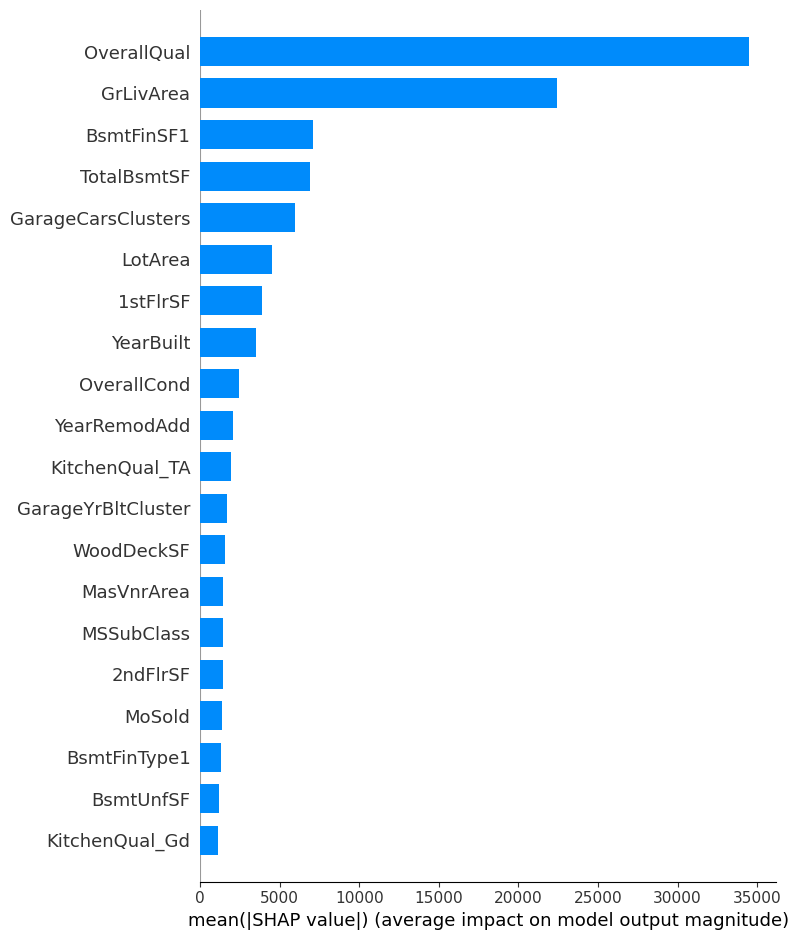

In [128]:
shap.summary_plot(shap_df, X_train, plot_type="bar")
#keep the below columns only
"""
"OverallQual"
"GrLivArea"
"BsmtFinSF1"
"TotalBsmtSF"
"GarageCarsClusters"
"LotArea"
"1stFlrSF"
"YearBuilt"
"OverallCond"
"YearRemodAdd"
"KitchenQual_TA"
"""

In [130]:
X = df_encoded.drop(["SalePrice","OverallQual","GrLivArea","BsmtFinSF1","TotalBsmtSF","GarageCarsClusters"
,"LotArea"
,"1stFlrSF"
,"YearBuilt"
,"OverallCond"
,"YearRemodAdd"
,"KitchenQual_TA"],axis=1)

y = df_encoded["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0,shuffle=True)

In [131]:
def objective(space):
    clf=xgboost.XGBRegressor(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train, y_train), ( X_test, y_test)]
    
    clf.fit(X_train, y_train,
            eval_set=evaluation, eval_metric="auc",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, pred>0.5)
    print ("SCORE:", accuracy)
    return {'loss': -accuracy, 'status': STATUS_OK }

In [132]:
trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

[22:17:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:17] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:18] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
SCORE:                                                                                                                 
0.0                                                                                                                    
[22:17:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgb

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



SCORE:
0.0                                                                                                                    
[22:17:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:1

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:19] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:20] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:21] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:22] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:23] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:24] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:25] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:26] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



0.0                                                                                                                    
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARN

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:28] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:30] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:31] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:32] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
SCORE:                                                                                                                 
0.0                                                                                                                    
[22:17:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgb

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



SCORE:
0.0                                                                                                                    
[22:17:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:3

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



0.0
[22:17:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:33] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset co

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:34] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



0.0                                                                                                                    
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARN

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



0.0                                                                                                                    
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARN

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:35] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



SCORE:                                                                                                                 
0.0                                                                                                                    
[22:17:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:36] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgb

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:37] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



[22:17:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contains only positive or negative samples.
[22:17:38] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\metric\auc.cc:307: Dataset contai

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.



In [133]:
print("The best hyperparameters are : ","\n")
print(best_hyperparams)

The best hyperparameters are :  

{'colsample_bytree': 0.7435208730939789, 'gamma': 2.561816618551311, 'max_depth': 16.0, 'min_child_weight': 7.0, 'reg_alpha': 113.0, 'reg_lambda': 0.7247284370740276}


In [134]:
model = xgboost.XGBRegressor(colsample_bytree= 0.7435208730939789
                             ,gamma= 2.561816618551311
                             ,max_depth= 16
                             ,min_child_weight= 7
                             ,reg_alpha= 1, reg_lambda= 0.7247284370740276)

In [135]:
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [136]:
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 24630.964 (1734.091)


-----

In [143]:
X = df_encoded.drop("SalePrice",axis=1)

y = df_encoded["SalePrice"]

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0,shuffle=True)

In [145]:
model = xgboost.XGBRegressor()

In [146]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [147]:
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [148]:
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 18827.540 (2053.303)


In [ ]:
---

In [149]:
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

In [150]:
X = df_encoded.drop("SalePrice",axis=1)

y = df_encoded["SalePrice"]

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0,shuffle=True)

In [152]:
model = xgboost.XGBRegressor()

In [155]:
xgb_grid = GridSearchCV(model,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [156]:
xgb_grid.fit(X_train,y_train)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[22:24:27] WARNING: c:\windows\temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[22:24:27] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




GridSearchCV(cv=2,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    enable_categorical=False, gamma=None,
                                    gpu_id=None, importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n...
                                    random_state=None, reg_alpha=None,
                                    reg_lambda=None, scale_pos_weight=None,
                                    subsample=None, tree_method=None,
                                    validate_parameters=None, verbosity=None),
             n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [4],
                         'n_estimators': [500], 'nthread': [4],
                         'objective': ['reg:linear'], 'silent': [1],
                         'subsample': [0.7]},
             verbose=True)

In [157]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

0.8008311246134163
{'colsample_bytree': 0.7, 'learning_rate': 0.03, 'max_depth': 7, 'min_child_weight': 4, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


----

In [150]:
X = df_encoded.drop("SalePrice",axis=1)

y = df_encoded["SalePrice"]

In [151]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0,shuffle=True)

In [159]:
model = xgboost.XGBRegressor(colsample_bytree=0.7, learning_rate= 0.03,max_depth= 7, min_child_weight= 4, n_estimators= 500, nthread= 4, objective= "reg:linear", silent= 1, subsample= 0.7)

In [160]:
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [161]:
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)

In [162]:
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

Mean MAE: 16198.347 (2245.357)


In [ ]:
# we got a mean mae of 16,198 with our best performing model
# The mean value of a house is 180921.195890 meaning we have around an 8% error with our prediction (16,198/180,921)

In [82]:
X2 = df_encoded.drop("SalePrice",axis=1)
X2 = pd.get_dummies(X2,drop_first=True)

y2 = df_encoded["SalePrice"]

In [83]:
X2

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,60,7917,6,5,1999,2000,0.0,953,953,953,...,0,0,0,0,1,0,0,0,1,0
1448,20,13175,6,6,1978,1988,119.0,589,1542,2073,...,0,0,0,0,1,0,0,0,1,0
1449,70,9042,7,9,1941,2006,0.0,877,1152,1188,...,0,0,0,0,1,0,0,0,1,0
1450,20,9717,5,6,1950,1996,0.0,0,1078,1078,...,0,0,0,0,1,0,0,0,1,0


In [182]:
#this line was added because the test set did not have these features so I removed them from the train set before fitting
X2.drop(['PoolQC_Fa','MiscFeature_TenC','GarageQual_Fa','Utilities_NoSeWa','Condition2_RRAe','Condition2_RRAn','Condition2_RRNn','HouseStyle_2.5Fin','RoofMatl_CompShg','RoofMatl_Membran','RoofMatl_Metal','RoofMatl_Roll','Exterior1st_ImStucc','Exterior1st_Stone','Exterior2nd_Other','Heating_GasA','Heating_OthW','Electrical_Mix'],axis=1,inplace=True)

In [183]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.3, random_state = 0,shuffle=True)

In [184]:
model2 = xgboost.XGBRegressor(colsample_bytree=0.7, learning_rate= 0.03,max_depth= 7, min_child_weight= 4, n_estimators= 500, nthread= 4, objective= "reg:linear", silent= 1, subsample= 0.7)

In [185]:
model2.fit(X_train2,y_train2)

pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.


[00:02:29] WARNING: c:\windows\temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\objective\regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.
[00:02:29] WARNING: C:\Windows\Temp\abs_557yfx631l\croots\recipe\xgboost-split_1659548953302\work\src\learner.cc:576: 
Parameters: { "silent" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.03, max_delta_step=0,
             max_depth=7, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4, nthread=4,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             silent=1, subsample=0.7, tree_method='exact',
             validate_parameters=1, ...)

In [186]:
X_train2

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
1381,50,6000,6,6,1941,1950,0.0,360,735,869,...,0,0,0,0,1,0,0,0,1,0
418,20,8450,5,6,1968,1968,0.0,281,1056,1056,...,0,0,0,0,1,0,0,0,1,0
891,90,7018,5,5,1979,1979,0.0,0,0,1535,...,0,0,0,0,1,0,1,0,0,0
759,60,8640,7,5,2009,2009,0.0,732,756,764,...,0,0,0,0,0,0,0,0,1,0
443,60,8750,7,5,1994,1995,0.0,273,915,933,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,60,10421,7,5,1988,1988,42.0,586,980,980,...,0,0,0,0,1,0,0,0,1,0
835,20,9525,5,6,1995,2006,0.0,1099,1099,1099,...,0,0,0,0,1,0,0,0,1,0
1216,50,10496,6,6,1949,1950,320.0,844,1040,1168,...,0,0,0,0,1,0,0,0,1,0
559,20,10010,5,5,1974,1975,0.0,195,1389,1389,...,0,0,0,0,1,0,0,0,1,0


In [187]:
cv2 = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [188]:
scores2 = cross_val_score(model2, X_train2, y_train2, scoring='neg_root_mean_squared_error', cv=cv2, n_jobs=-1)

In [189]:
scores2= np.absolute(scores2)
print('RMSE: %.3f (%.3f)' % (scores2.mean(), scores2.std()) )

RMSE: 29445.696 (10625.892)


In [190]:
model2

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.7, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.03, max_delta_step=0,
             max_depth=7, min_child_weight=4, missing=nan,
             monotone_constraints='()', n_estimators=500, n_jobs=4, nthread=4,
             num_parallel_tree=1, objective='reg:linear', predictor='auto',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             silent=1, subsample=0.7, tree_method='exact',
             validate_parameters=1, ...)

In [176]:
# we got a RMSE of 29542 with our best performing model
# The mean value of a house is 180921.195890 meaning we have around an 16% error with our prediction (29542/180,921)

NameError: name 'sklearn' is not defined

In [191]:
# save the model to disk
filename = 'house_price_model.sav'
pickle.dump(model2, open(filename, 'wb'))

In [180]:
#### read the kaggle test file

In [457]:
df = pd.read_csv("test_HousePrices_v1.csv")

In [458]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [459]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,2190.000000,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,421.321334,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,1461.000000,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,1825.500000,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,2190.000000,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2554.500000,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2919.000000,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [460]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

### Observation one, converting NA from specific columns to value == None

In [461]:
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [462]:
df["Alley"].head(10)

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
6    NaN
7    NaN
8    NaN
9    NaN
Name: Alley, dtype: object

In [463]:
#make a copy of the original dataframe
df_copy_1 = df.copy()

In [464]:
df_obj_1 = df_copy_1[["Alley","FireplaceQu","GarageType","GarageFinish","PoolQC","Fence","MiscFeature","GarageQual","GarageCond"]].fillna("None")
#filter out the desired columns and fill na. Then save into a dataframe by itself
# -GarageQual
# -GarageCond

In [465]:
df_obj_1

,Alley,FireplaceQu,GarageType,GarageFinish,PoolQC,Fence,MiscFeature,GarageQual,GarageCond
0,None,None,Attchd,Unf,None,MnPrv,None,TA,TA
1,None,None,Attchd,Unf,None,None,Gar2,TA,TA
2,None,TA,Attchd,Fin,None,MnPrv,None,TA,TA
3,None,Gd,Attchd,Fin,None,None,None,TA,TA
4,None,None,Attchd,RFn,None,None,None,TA,TA
...,...,...,...,...,...,...,...,...,...
1454,None,None,None,None,None,None,None,None,None
1455,None,None,CarPort,Unf,None,None,None,TA,TA
1456,None,TA,Detchd,Unf,None,None,None,TA,TA
1457,None,None,None,None,None,MnPrv,Shed,None,None


In [466]:
#drop the columns we filtered out from the copy of the original dataframe
df_copy_1.drop(["Alley","FireplaceQu","GarageType","GarageFinish","PoolQC","Fence","MiscFeature","GarageQual","GarageCond"],axis=1,inplace=True)


In [467]:
df_copy_1

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,Reg,Lvl,AllPub,Inside,...,32,0,0,0,0,700,7,2006,WD,Normal


In [468]:
#re-add the columns to the copy of the original dataframe. The columns now have the value None versus NA. Save the result to df_obj_1_done
result = [df_obj_1,df_copy_1]
df_obj_1_done =pd.concat(result,axis=1)

In [469]:
df_obj_1_done

,Alley,FireplaceQu,GarageType,GarageFinish,PoolQC,Fence,MiscFeature,GarageQual,GarageCond,Id,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,None,None,Attchd,Unf,None,MnPrv,None,TA,TA,1461,...,0,0,0,120,0,0,6,2010,WD,Normal
1,None,None,Attchd,Unf,None,None,Gar2,TA,TA,1462,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,None,TA,Attchd,Fin,None,MnPrv,None,TA,TA,1463,...,34,0,0,0,0,0,3,2010,WD,Normal
3,None,Gd,Attchd,Fin,None,None,None,TA,TA,1464,...,36,0,0,0,0,0,6,2010,WD,Normal
4,None,None,Attchd,RFn,None,None,None,TA,TA,1465,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,None,None,None,None,None,None,None,None,None,2915,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,None,None,CarPort,Unf,None,None,None,TA,TA,2916,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,None,TA,Detchd,Unf,None,None,None,TA,TA,2917,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,None,None,None,None,None,MnPrv,Shed,None,None,2918,...,32,0,0,0,0,700,7,2006,WD,Normal


In [470]:
df_obj_1_done.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Alley          1459 non-null   object 
 1   FireplaceQu    1459 non-null   object 
 2   GarageType     1459 non-null   object 
 3   GarageFinish   1459 non-null   object 
 4   PoolQC         1459 non-null   object 
 5   Fence          1459 non-null   object 
 6   MiscFeature    1459 non-null   object 
 7   GarageQual     1459 non-null   object 
 8   GarageCond     1459 non-null   object 
 9   Id             1459 non-null   int64  
 10  MSSubClass     1459 non-null   int64  
 11  MSZoning       1455 non-null   object 
 12  LotFrontage    1232 non-null   float64
 13  LotArea        1459 non-null   int64  
 14  Street         1459 non-null   object 
 15  LotShape       1459 non-null   object 
 16  LandContour    1459 non-null   object 
 17  Utilities      1457 non-null   object 
 18  LotConfi

----

### Objective 2, filling missing year values

##### Starting with column GarageYrBlt

<AxesSubplot: >

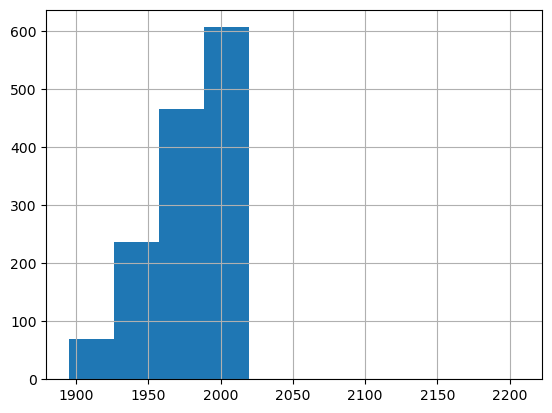

In [471]:
#Check the distribution of the column to identfy bins in order to split the data into a new column of clusters
# each cluster will contain~20 yrs
df_obj_1_done["GarageYrBlt"].hist()

In [472]:
df_obj_1_done["GarageYrBlt"].describe()
#check the spread of data and std

count    1381.000000
mean     1977.721217
std        26.431175
min      1895.000000
25%      1959.000000
50%      1979.000000
75%      2002.000000
max      2207.000000
Name: GarageYrBlt, dtype: float64

In [473]:
max_garage_yr = df_obj_1_done["GarageYrBlt"].max()
# obtain the max year of garageyrblt and save it to a variable to use it in our function below

2) Handling missing values from dates for example garage year built
GarageYrBlt, since its a date how to treat NA? Create new column that will group dates based on bins where 0 = No garage, 1 = 30+ years ago, 2= 25-29 yrs ago etc. Need to see spread of dates -GarageQual -GarageCond

Similar handling for GarageCars and GarageArea as GarageYrBlt Need to check LotFrontage to see missing area

In [474]:
# our function will assign a cluster to each house based on the difference of the max yr in the column minus the house year
# if we have a missing value meaning no garage the label of 0 will be assigned
def garage_date(x):
    if pd.isnull(x):
        return 0
    elif max_garage_yr - x >= 100:
        return 1
    elif max_garage_yr - x >= 80 and max_garage_yr - x < 100:
        return 2
    elif max_garage_yr - x >= 60 and max_garage_yr - x <80:
        return 3
    elif max_garage_yr - x >= 40 and max_garage_yr - x <60:
        return 4
    elif max_garage_yr - x >= 20 and max_garage_yr - x <40:
        return 5
    elif max_garage_yr - x >= 0 and max_garage_yr - x <20:
        return 6

In [475]:
#we test the function to validate it is working
df_obj_1_done["GarageYrBlt"].apply(garage_date)

0       1
1       1
2       1
3       1
4       1
       ..
1454    0
1455    1
1456    1
1457    0
1458    1
Name: GarageYrBlt, Length: 1459, dtype: int64

In [476]:
# create a copy of the dataframe
df_obj_2_done =df_obj_1_done.copy()

In [477]:
df_obj_2_done

,Alley,FireplaceQu,GarageType,GarageFinish,PoolQC,Fence,MiscFeature,GarageQual,GarageCond,Id,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,None,None,Attchd,Unf,None,MnPrv,None,TA,TA,1461,...,0,0,0,120,0,0,6,2010,WD,Normal
1,None,None,Attchd,Unf,None,None,Gar2,TA,TA,1462,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,None,TA,Attchd,Fin,None,MnPrv,None,TA,TA,1463,...,34,0,0,0,0,0,3,2010,WD,Normal
3,None,Gd,Attchd,Fin,None,None,None,TA,TA,1464,...,36,0,0,0,0,0,6,2010,WD,Normal
4,None,None,Attchd,RFn,None,None,None,TA,TA,1465,...,82,0,0,144,0,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,None,None,None,None,None,None,None,None,None,2915,...,0,0,0,0,0,0,6,2006,WD,Normal
1455,None,None,CarPort,Unf,None,None,None,TA,TA,2916,...,24,0,0,0,0,0,4,2006,WD,Abnorml
1456,None,TA,Detchd,Unf,None,None,None,TA,TA,2917,...,0,0,0,0,0,0,9,2006,WD,Abnorml
1457,None,None,None,None,None,MnPrv,Shed,None,None,2918,...,32,0,0,0,0,700,7,2006,WD,Normal


In [478]:
#save it in a new column
df_obj_2_done["GarageYrBltCluster"]=df_obj_2_done["GarageYrBlt"].apply(garage_date)

In [479]:
df_obj_2_done

,Alley,FireplaceQu,GarageType,GarageFinish,PoolQC,Fence,MiscFeature,GarageQual,GarageCond,Id,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYrBltCluster
0,None,None,Attchd,Unf,None,MnPrv,None,TA,TA,1461,...,0,0,120,0,0,6,2010,WD,Normal,1
1,None,None,Attchd,Unf,None,None,Gar2,TA,TA,1462,...,0,0,0,0,12500,6,2010,WD,Normal,1
2,None,TA,Attchd,Fin,None,MnPrv,None,TA,TA,1463,...,0,0,0,0,0,3,2010,WD,Normal,1
3,None,Gd,Attchd,Fin,None,None,None,TA,TA,1464,...,0,0,0,0,0,6,2010,WD,Normal,1
4,None,None,Attchd,RFn,None,None,None,TA,TA,1465,...,0,0,144,0,0,1,2010,WD,Normal,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,None,None,None,None,None,None,None,None,None,2915,...,0,0,0,0,0,6,2006,WD,Normal,0
1455,None,None,CarPort,Unf,None,None,None,TA,TA,2916,...,0,0,0,0,0,4,2006,WD,Abnorml,1
1456,None,TA,Detchd,Unf,None,None,None,TA,TA,2917,...,0,0,0,0,0,9,2006,WD,Abnorml,1
1457,None,None,None,None,None,MnPrv,Shed,None,None,2918,...,0,0,0,0,700,7,2006,WD,Normal,0


In [480]:
# remove the GarageYrBlt column
df_obj_2_done.drop("GarageYrBlt",axis=1,inplace=True)

##### Explore GarageCars GarageArea

In [481]:
#GarageCars and GarageArea appear to be the same
#Garage Cars measures the capacity in terms of cars that can fit, while GarageArea based on square feet
# We will check the spread of both to see which one we will keep

<AxesSubplot: >

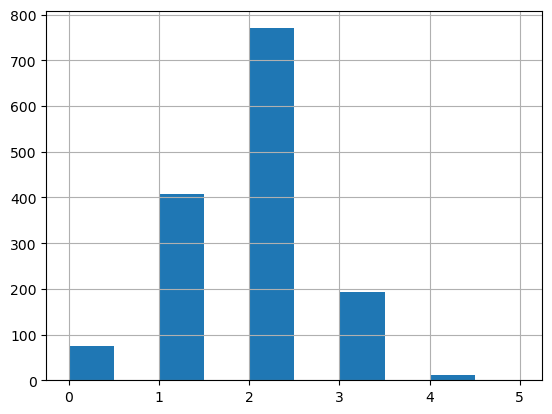

In [482]:
df_obj_2_done["GarageCars"].hist()

In [483]:
df_obj_2_done["GarageCars"].describe()

count    1458.000000
mean        1.766118
std         0.775945
min         0.000000
25%         1.000000
50%         2.000000
75%         2.000000
max         5.000000
Name: GarageCars, dtype: float64

<AxesSubplot: >

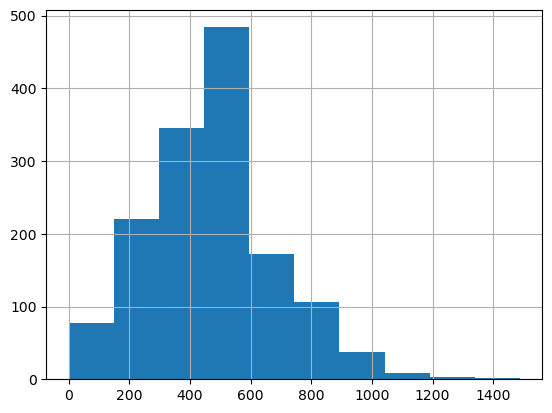

In [484]:
df_obj_2_done["GarageArea"].hist()

In [485]:
df_obj_2_done["GarageArea"].describe()

count    1458.000000
mean      472.768861
std       217.048611
min         0.000000
25%       318.000000
50%       480.000000
75%       576.000000
max      1488.000000
Name: GarageArea, dtype: float64

In [486]:
# we will keep only GarageCars since we will have less number of categories for the new column (can split in less bins)
df_obj_2_done.drop("GarageArea",axis=1,inplace = True)

##### GarageCars bins

In [487]:
# save the max number of car capacity to a variable
#garage_cars_max = df_obj_2_done["GarageCars"].max()

In [488]:
#if null assign to category 0, meaning does not exist. To not overlap with values that are actually 0
# else assign +1 to the value. So for a car capacity of 4 would become 5
def garage_cars(x):
    if pd.isnull(x):
        return 0
    else:
        return x + 1

In [489]:
df_obj_2_done["GarageCars"].apply(garage_cars)

0       2.0
1       2.0
2       3.0
3       3.0
4       3.0
       ... 
1454    1.0
1455    2.0
1456    3.0
1457    1.0
1458    4.0
Name: GarageCars, Length: 1459, dtype: float64

In [490]:
df_obj_2_done["GarageCarsClusters"]=df_obj_2_done["GarageCars"].apply(garage_cars)

In [491]:
df_obj_2_done

,Alley,FireplaceQu,GarageType,GarageFinish,PoolQC,Fence,MiscFeature,GarageQual,GarageCond,Id,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYrBltCluster,GarageCarsClusters
0,None,None,Attchd,Unf,None,MnPrv,None,TA,TA,1461,...,0,120,0,0,6,2010,WD,Normal,1,2.0
1,None,None,Attchd,Unf,None,None,Gar2,TA,TA,1462,...,0,0,0,12500,6,2010,WD,Normal,1,2.0
2,None,TA,Attchd,Fin,None,MnPrv,None,TA,TA,1463,...,0,0,0,0,3,2010,WD,Normal,1,3.0
3,None,Gd,Attchd,Fin,None,None,None,TA,TA,1464,...,0,0,0,0,6,2010,WD,Normal,1,3.0
4,None,None,Attchd,RFn,None,None,None,TA,TA,1465,...,0,144,0,0,1,2010,WD,Normal,1,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,None,None,None,None,None,None,None,None,None,2915,...,0,0,0,0,6,2006,WD,Normal,0,1.0
1455,None,None,CarPort,Unf,None,None,None,TA,TA,2916,...,0,0,0,0,4,2006,WD,Abnorml,1,2.0
1456,None,TA,Detchd,Unf,None,None,None,TA,TA,2917,...,0,0,0,0,9,2006,WD,Abnorml,1,3.0
1457,None,None,None,None,None,MnPrv,Shed,None,None,2918,...,0,0,0,700,7,2006,WD,Normal,0,1.0


In [492]:
#remove GarageCars
df_obj_2_done.drop("GarageCars",axis=1,inplace=True)

In [493]:
df_obj_2_done.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Alley               1459 non-null   object 
 1   FireplaceQu         1459 non-null   object 
 2   GarageType          1459 non-null   object 
 3   GarageFinish        1459 non-null   object 
 4   PoolQC              1459 non-null   object 
 5   Fence               1459 non-null   object 
 6   MiscFeature         1459 non-null   object 
 7   GarageQual          1459 non-null   object 
 8   GarageCond          1459 non-null   object 
 9   Id                  1459 non-null   int64  
 10  MSSubClass          1459 non-null   int64  
 11  MSZoning            1455 non-null   object 
 12  LotFrontage         1232 non-null   float64
 13  LotArea             1459 non-null   int64  
 14  Street              1459 non-null   object 
 15  LotShape            1459 non-null   object 
 16  LandCo

##### treating lot frontage 

<AxesSubplot: >

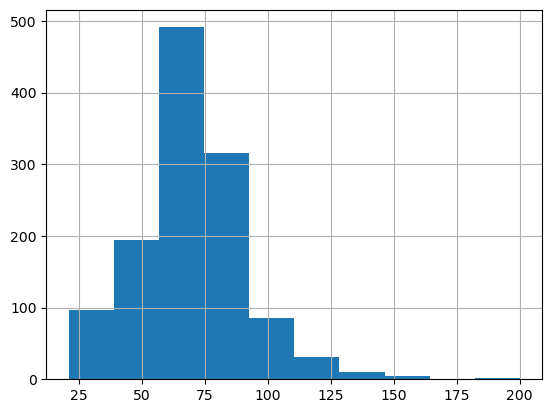

In [494]:
df_obj_2_done["LotFrontage"].hist()

In [495]:
df_obj_2_done["LotFrontage"].describe()
#we will create bins of 50

count    1232.000000
mean       68.580357
std        22.376841
min        21.000000
25%        58.000000
50%        67.000000
75%        80.000000
max       200.000000
Name: LotFrontage, dtype: float64

In [496]:
#lot_frontage_max = df_obj_2_done["LotFrontage"].max()

In [497]:
#function to create bins based on the lotfrontage column
def frontage_bins(x):
    if pd.isnull(x):
        return 0
    elif x >= 300:
        return 1
    elif x >= 250 and x < 300:
        return 2
    elif x >= 200 and x < 250:
        return 3
    elif x >= 150 and x < 200:
        return 4
    elif x >= 100 and x < 150:
        return 5
    elif x >= 50 and x < 100:
        return 6
    elif x >= 0 and x < 50:
        return 7

In [498]:
df_obj_2_done["LotFrontage"].apply(frontage_bins)
# test the function

0       6
1       6
2       6
3       6
4       7
       ..
1454    7
1455    7
1456    4
1457    6
1458    6
Name: LotFrontage, Length: 1459, dtype: int64

In [499]:
df_obj_2_done["LotFrontage"].apply(frontage_bins).describe() #validate the application

count    1459.000000
mean        5.107608
std         2.237311
min         0.000000
25%         6.000000
50%         6.000000
75%         6.000000
max         7.000000
Name: LotFrontage, dtype: float64

In [500]:
#save to new cluster column
df_obj_2_done["LotFrontageCluster"]=df_obj_2_done["LotFrontage"].apply(frontage_bins)

In [501]:
#drop the original LotFrontage
df_obj_2_done.drop("LotFrontage",axis=1,inplace=True)

In [502]:
df_obj_2_done.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 79 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Alley               1459 non-null   object 
 1   FireplaceQu         1459 non-null   object 
 2   GarageType          1459 non-null   object 
 3   GarageFinish        1459 non-null   object 
 4   PoolQC              1459 non-null   object 
 5   Fence               1459 non-null   object 
 6   MiscFeature         1459 non-null   object 
 7   GarageQual          1459 non-null   object 
 8   GarageCond          1459 non-null   object 
 9   Id                  1459 non-null   int64  
 10  MSSubClass          1459 non-null   int64  
 11  MSZoning            1455 non-null   object 
 12  LotArea             1459 non-null   int64  
 13  Street              1459 non-null   object 
 14  LotShape            1459 non-null   object 
 15  LandContour         1459 non-null   object 
 16  Utilit

In [503]:
#drop the id column
id_column = df_obj_2_done["Id"]
df_obj_2_done.drop("Id",axis=1,inplace=True)

In [504]:
df_obj_2_done.columns

Index(['Alley', 'FireplaceQu', 'GarageType', 'GarageFinish', 'PoolQC', 'Fence',
       'MiscFeature', 'GarageQual', 'GarageCond', 'MSSubClass', 'MSZoning',
       'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF'

In [505]:
### Objective 3

In [506]:
df_obj_2_done["MasVnrType"].value_counts()

None       878
BrkFace    434
Stone      121
BrkCmn      10
Name: MasVnrType, dtype: int64

In [507]:
# drop na since we cant inpute a value MasVnrType MasVnrArea

df_obj_2_done[["MasVnrType","MasVnrArea"]].fillna("None",inplace=True)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [508]:
df_obj_2_done.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 78 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Alley               1459 non-null   object 
 1   FireplaceQu         1459 non-null   object 
 2   GarageType          1459 non-null   object 
 3   GarageFinish        1459 non-null   object 
 4   PoolQC              1459 non-null   object 
 5   Fence               1459 non-null   object 
 6   MiscFeature         1459 non-null   object 
 7   GarageQual          1459 non-null   object 
 8   GarageCond          1459 non-null   object 
 9   MSSubClass          1459 non-null   int64  
 10  MSZoning            1455 non-null   object 
 11  LotArea             1459 non-null   int64  
 12  Street              1459 non-null   object 
 13  LotShape            1459 non-null   object 
 14  LandContour         1459 non-null   object 
 15  Utilities           1457 non-null   object 
 16  LotCon

In [509]:
df_obj_2_done.columns

Index(['Alley', 'FireplaceQu', 'GarageType', 'GarageFinish', 'PoolQC', 'Fence',
       'MiscFeature', 'GarageQual', 'GarageCond', 'MSSubClass', 'MSZoning',
       'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF'

In [510]:
df_obj_2_done_copy =df_obj_2_done.copy()
#df_obj_2_done['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1','BsmtFinType2', 'BsmtFinSF2']

In [511]:
df_obj2_bsmt = df_obj_2_done_copy[['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1','BsmtFinType2', 'BsmtFinSF2']]

In [512]:
df_obj2_bsmt

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2
0,TA,TA,No,Rec,468.0,LwQ,144.0
1,TA,TA,No,ALQ,923.0,Unf,0.0
2,Gd,TA,No,GLQ,791.0,Unf,0.0
3,TA,TA,No,GLQ,602.0,Unf,0.0
4,Gd,TA,No,ALQ,263.0,Unf,0.0
...,...,...,...,...,...,...,...
1454,TA,TA,No,Unf,0.0,Unf,0.0
1455,TA,TA,No,Rec,252.0,Unf,0.0
1456,TA,TA,No,ALQ,1224.0,Unf,0.0
1457,Gd,TA,Av,GLQ,337.0,Unf,0.0


In [513]:
bsmt_imputer = KNNImputer()

In [514]:
df_obj2_bsmt_encoded = df_obj2_bsmt.apply(lambda series: pd.Series(
    LabelEncoder().fit_transform(series[series.notnull()]),
    index=series[series.notnull()].index
))

In [515]:
df_obj2_bsmt_imputed = bsmt_imputer.fit_transform(df_obj2_bsmt_encoded)

In [516]:
df_obj2_bsmt_df = pd.DataFrame(df_obj2_bsmt_imputed,columns=df_obj2_bsmt.columns)

In [517]:
df_obj2_bsmt_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458 entries, 0 to 1457
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BsmtQual      1458 non-null   float64
 1   BsmtCond      1458 non-null   float64
 2   BsmtExposure  1458 non-null   float64
 3   BsmtFinType1  1458 non-null   float64
 4   BsmtFinSF1    1458 non-null   float64
 5   BsmtFinType2  1458 non-null   float64
 6   BsmtFinSF2    1458 non-null   float64
dtypes: float64(7)
memory usage: 79.9 KB


In [518]:
df_obj2_bsmt_df.columns

Index(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2'],
      dtype='object')

In [519]:
df_obj_2_done

,Alley,FireplaceQu,GarageType,GarageFinish,PoolQC,Fence,MiscFeature,GarageQual,GarageCond,MSSubClass,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYrBltCluster,GarageCarsClusters,LotFrontageCluster
0,None,None,Attchd,Unf,None,MnPrv,None,TA,TA,20,...,120,0,0,6,2010,WD,Normal,1,2.0,6
1,None,None,Attchd,Unf,None,None,Gar2,TA,TA,20,...,0,0,12500,6,2010,WD,Normal,1,2.0,6
2,None,TA,Attchd,Fin,None,MnPrv,None,TA,TA,60,...,0,0,0,3,2010,WD,Normal,1,3.0,6
3,None,Gd,Attchd,Fin,None,None,None,TA,TA,60,...,0,0,0,6,2010,WD,Normal,1,3.0,6
4,None,None,Attchd,RFn,None,None,None,TA,TA,120,...,144,0,0,1,2010,WD,Normal,1,3.0,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,None,None,None,None,None,None,None,None,None,160,...,0,0,0,6,2006,WD,Normal,0,1.0,7
1455,None,None,CarPort,Unf,None,None,None,TA,TA,160,...,0,0,0,4,2006,WD,Abnorml,1,2.0,7
1456,None,TA,Detchd,Unf,None,None,None,TA,TA,20,...,0,0,0,9,2006,WD,Abnorml,1,3.0,4
1457,None,None,None,None,None,MnPrv,Shed,None,None,85,...,0,0,700,7,2006,WD,Normal,0,1.0,6


In [520]:
df_obj_2_done.drop(['BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2'],axis=1,inplace=True)

In [521]:
df_obj_2_done.reset_index(inplace=True,drop=True)

In [522]:
df_obj_2_done.columns

Index(['Alley', 'FireplaceQu', 'GarageType', 'GarageFinish', 'PoolQC', 'Fence',
       'MiscFeature', 'GarageQual', 'GarageCond', 'MSSubClass', 'MSZoning',
       'LotArea', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional',
       'Fireplaces', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType'

In [523]:
df_obj2_bsmt_df

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2
0,3.0,3.0,3.0,4.0,227.0,3.0,31.0
1,3.0,3.0,3.0,0.0,478.0,5.0,0.0
2,2.0,3.0,3.0,2.0,417.0,5.0,0.0
3,3.0,3.0,3.0,2.0,310.0,5.0,0.0
4,2.0,3.0,3.0,0.0,107.0,5.0,0.0
...,...,...,...,...,...,...,...
1453,3.0,3.0,3.0,5.0,0.0,5.0,0.0
1454,3.0,3.0,3.0,4.0,98.0,5.0,0.0
1455,3.0,3.0,3.0,0.0,588.0,5.0,0.0
1456,2.0,3.0,0.0,2.0,150.0,5.0,0.0


In [524]:
result2 = [df_obj_2_done,df_obj2_bsmt_df]
df_obj_3_done =pd.concat(result2,axis=1)

In [525]:
df_obj_3_done

,Alley,FireplaceQu,GarageType,GarageFinish,PoolQC,Fence,MiscFeature,GarageQual,GarageCond,MSSubClass,...,GarageYrBltCluster,GarageCarsClusters,LotFrontageCluster,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2
0,None,None,Attchd,Unf,None,MnPrv,None,TA,TA,20,...,1,2.0,6,3.0,3.0,3.0,4.0,227.0,3.0,31.0
1,None,None,Attchd,Unf,None,None,Gar2,TA,TA,20,...,1,2.0,6,3.0,3.0,3.0,0.0,478.0,5.0,0.0
2,None,TA,Attchd,Fin,None,MnPrv,None,TA,TA,60,...,1,3.0,6,2.0,3.0,3.0,2.0,417.0,5.0,0.0
3,None,Gd,Attchd,Fin,None,None,None,TA,TA,60,...,1,3.0,6,3.0,3.0,3.0,2.0,310.0,5.0,0.0
4,None,None,Attchd,RFn,None,None,None,TA,TA,120,...,1,3.0,7,2.0,3.0,3.0,0.0,107.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,None,None,None,None,None,None,None,None,None,160,...,0,1.0,7,3.0,3.0,3.0,4.0,98.0,5.0,0.0
1455,None,None,CarPort,Unf,None,None,None,TA,TA,160,...,1,2.0,7,3.0,3.0,3.0,0.0,588.0,5.0,0.0
1456,None,TA,Detchd,Unf,None,None,None,TA,TA,20,...,1,3.0,4,2.0,3.0,0.0,2.0,150.0,5.0,0.0
1457,None,None,None,None,None,MnPrv,Shed,None,None,85,...,0,1.0,6,2.0,3.0,0.0,3.0,395.0,5.0,0.0


In [526]:
df_obj_3_done.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 78 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Alley               1459 non-null   object 
 1   FireplaceQu         1459 non-null   object 
 2   GarageType          1459 non-null   object 
 3   GarageFinish        1459 non-null   object 
 4   PoolQC              1459 non-null   object 
 5   Fence               1459 non-null   object 
 6   MiscFeature         1459 non-null   object 
 7   GarageQual          1459 non-null   object 
 8   GarageCond          1459 non-null   object 
 9   MSSubClass          1459 non-null   int64  
 10  MSZoning            1455 non-null   object 
 11  LotArea             1459 non-null   int64  
 12  Street              1459 non-null   object 
 13  LotShape            1459 non-null   object 
 14  LandContour         1459 non-null   object 
 15  Utilities           1457 non-null   object 
 16  LotCon

----

In [527]:
df_encoded = pd.get_dummies(df_obj_3_done,drop_first=True)

In [528]:
X2

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,150,856,856,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,284,1262,1262,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,434,920,920,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,540,756,961,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,490,1145,1145,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1447,60,7917,6,5,1999,2000,0.0,953,953,953,...,0,0,0,0,1,0,0,0,1,0
1448,20,13175,6,6,1978,1988,119.0,589,1542,2073,...,0,0,0,0,1,0,0,0,1,0
1449,70,9042,7,9,1941,2006,0.0,877,1152,1188,...,0,0,0,0,1,0,0,0,1,0
1450,20,9717,5,6,1950,1996,0.0,0,1078,1078,...,0,0,0,0,1,0,0,0,1,0


In [529]:
list1 = []
for i in X2.columns:
    if i not in df_encoded:
        list1.append(i)

In [530]:
list1

[]

In [531]:
model_predictions = model2.predict(df_encoded)

In [532]:
model_predictions

array([112583.73, 155467.53, 179967.47, ..., 153424.69, 113014.73,
       220517.88], dtype=float32)

In [533]:
df_encoded.reset_index(inplace=True)

In [534]:
df_encoded.columns

Index(['index', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'TotalBsmtSF',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=222)

In [538]:
id_column

0       1461
1       1462
2       1463
3       1464
4       1465
        ... 
1454    2915
1455    2916
1456    2917
1457    2918
1458    2919
Name: Id, Length: 1459, dtype: int64

In [542]:
submission = pd.DataFrame(data=model_predictions,index = id_column)

In [536]:
submission.columns

Index(['Id'], dtype='object')

In [544]:
submission.rename(columns={"index":"Id",0:"SalePrice"},inplace=True)

In [545]:
submission

,SalePrice
Id,
1461,112583.726562
1462,155467.531250
1463,179967.468750
1464,193375.984375
1465,173588.671875
...,...
2915,85756.250000
2916,85990.632812
2917,153424.687500


In [375]:
submission.to_csv("submission_house_nmargos_v1.csv")